**List of functions to be used throughout the code**



In [14]:
# Imported packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint, solve_ivp
import statistics as stat
import openpyxl
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from scipy import stats

# Used to calculate the weights for each given process based upon set weight function
def weights_finder(function,time,weight_store):
    weight_store = []
    for i in range(len(time)):
        weight_store_step = function[i]
        weight_store.append(weight_store_step)
    return weight_store
# Used to find the tipping points based upon the switching of weights above threshold which is then collected.
def tipping_point_finder(weights, time,tipping_point,threshholdlevel):
    tipping_point = []
    for i in range(len(time[1:])):
        if weights[i] >= threshholdlevel and weights[i-1] < threshholdlevel:
            tipping_point.append(time[i])
        elif weights[i] < threshholdlevel and weights[i-1] >= threshholdlevel:
            tipping_point.append(time[i])
        else:
            continue
    return tipping_point
# Counts the number of relevant processes based upon values of the weights, threshold and point in time.
def process_counter(Thresholdlevel,weight1,weight2,weight3,weight4,t,p):
  p=[]
  for i in range(len(t)):

    if weight1[i] < Thresholdlevel:
     p1 = 0
    else:
     p1 = 1
    if weight2[i] < Thresholdlevel:
      p2 = 0
    else:
      p2 = 1
    if weight3[i] < Thresholdlevel:
      p3 = 0
    else:
      p3 = 1
    if weight4[i] < Thresholdlevel:
      p4 = 0
    else:
      p4 = 1
    p_i = p1 + p2 + p3 + p4
    p.append(p_i)
  return p
# Counts the number number of relevant processes for phage agent based upon  weights, threshold and time; this is used for the Relevant processes graph.
def process_counter_phage(Thresholdlevel,time_list,processes_phage,weight_burst,weight_decay):
  for i in range(len(time_list)):
    if weight_burst[i] < Thresholdlevel:
      p1 = 0
    else:
      p1 = 1
    if weight_decay[i] < Thresholdlevel:
      p2 = 0
    else:
      p2 = 1
    process_phage_i = p1 + p2
    processes_phage.append(process_phage_i)
  return processes_phage
# Similar to process_counter_phage, but calculates only for the relevant processes for bacterial agent.
def process_counter_bacteria(Thresholdlevel,time_list,processes_bacteria,weight_growth,weight_predation):
  for i in range(len(time_list)):
    if weight_growth[i] < Thresholdlevel:
      p1 = 0
    else:
      p1 = 1
    if weight_predation[i] < Thresholdlevel:
      p2 = 0
    else:
      p2 = 1
    process_bacteria_i = p1 + p2
    processes_bacteria.append(process_bacteria_i)
  return processes_bacteria
# Function to calculate the absolute error between the adaptive model and the full model, this is used on both agents.
def true_error(t,Agent_full, Agent_adaptive,error_store_term):
  error_store_term = []
  for i in range(len(t)):
    error_store_term_i = abs(Agent_adaptive[i] - Agent_full[i])
    error_store_term.append(error_store_term_i)
  return error_store_term
# Function that calculates the relative error through dividing the absolute error by the full model value at each given unit of time.
def relative_error(t,error_store_term,Agent_full,relative_error):
  relative_error = []
  for i in range(len(t)):
    relative_error_input = (error_store_term[i]/Agent_full[i])
    relative_error.append(relative_error_input)
  return relative_error
# Take the relative error and converts it to percentage (multiplies by 100).
def relative_error_percentage_finder(relative_error,t,error_percentage):
  error_percentage = []
  for i in range(len(t)):
    error_percentage_input = relative_error[i] * 100
    error_percentage.append(error_percentage_input)
  return error_percentage

# This graph creates a line graph of the dynamics of both agents represented in both models, additionally, any tipping points will appear on the graph with the line pointing to the critical value that create a tipping point.
def population_plot_comparison_and_tipping_points(time_list, time_final, tipping_point_list, tipping_points_of_weight_predation, tipping_points_of_weights_burst, Agent_full_phage, Agent_full_bacteria, Agent_adaptive_phage, Agent_adaptive_bacteria):
    print('Below are the graphs representing both the tipping points and populations plot of both models')

    # Calculate the figure size to maintain the 227:127 ratio
    width_inches = 3.632
    height_inches = width_inches * (114 / 215)

    # Set up the figure and subplots
    fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=250)

    ax.semilogy(time_list, Agent_full_bacteria, label='Bacteria', color='b', linestyle='solid', linewidth=0.75)
    ax.semilogy(time_list, Agent_full_phage, label='Phage', color='r', linestyle='solid', linewidth=0.75)
    ax.semilogy(time_list, Agent_adaptive_bacteria, label='Adaptive', color='k', linestyle='dashed', dashes=(5,5), linewidth=0.75)
    ax.semilogy(time_list, Agent_adaptive_phage, color='k', linestyle='dashed', dashes=(5,5), linewidth=0.75)

    ax.set_xlabel("Time (h)", fontsize=7, labelpad=2)
    ax.set_ylabel('Concentration ($ml^{-1}$)', fontsize=7, labelpad=2)
    ax.set_xlim(0, time_final)

    if round(np.log10(max(Agent_full_phage))) > round(np.log10(max(Agent_full_bacteria))):
        max_limit = (1 * (10**round(np.log10(max(Agent_full_phage)))))
        ax.set_ylim(1, max_limit)
    else:
        max_limit = (1 * (10**round(np.log10(max(Agent_full_bacteria)))))
        ax.set_ylim(1, max_limit)

    if max_limit < 10**9:
        ax.set_yticks([10**0, 10**3, 10**6, 10**9])
    else:
        ax.set_yticks([10**0, 10**3, 10**6, 10**9, 10**12])

    # Format y-axis labels as 10^x
    def y_fmt(y, pos):
        decades = int(np.log10(y))
        return r'$10^{%d}$' % decades

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

    ax.minorticks_off()

    # Create evenly distributed tick marks
    num_ticks = 6  # You can adjust this number as needed
    x_ticks = np.linspace(0, time_final, num_ticks)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{x:.0f}' for x in x_ticks])

    # Setting up the vertical lines for tipping points
    if len(tipping_point_list) != 0:
        for tps in tipping_point_list:
            if tps in tipping_points_of_weight_predation:
                ax.vlines(x=tps, ymin=0, ymax=(float(Agent_full_phage[np.where(time_list == tps)[0][0]])), color='tab:grey', linestyle='solid', linewidth=0.75)
            elif tps in tipping_points_of_weights_burst:
                ax.vlines(x=tps, ymin=0, ymax=(float(Agent_full_bacteria[np.where(time_list == tps)[0][0]])), color='tab:grey', linestyle='solid', linewidth=0.75)
            else:
                print('error')

    ax.legend(fontsize=5, loc='best')

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=6, pad=2)

    plt.tight_layout(pad=0.1)

    # Add a thin border around the entire figure
    fig.patch.set_linewidth(0.5)
    fig.patch.set_edgecolor('black')

    # Save and show the figure
    plt.savefig('population_comparison_graph.svg', dpi=250, bbox_inches='tight')
    plt.show()
    return

# This function plots the weights as line graphs (subplots for each fo the weights), with the selected threshold level forming a line to distinguish where the weights would be relevant and irrelevant. The tipping point were shown as a vertical line.
def plot_weights_graphs(time_final, threshholdlevel, reference_level, weight_growth, weight_predation, weight_burst, weight_decay, tipping_point_list_predation, tipping_point_list_burst):
    # Create time array
    t = np.linspace(0, time_final, len(weight_growth))

    # Set up the figure and subplots
    fig, axweight = plt.subplots(4, 1, sharex=True, figsize=(3.632, 1.824), dpi=250)

    # Define plot settings based on reference_level
    if reference_level == 1:
        y_lim = (1e-4, 1e4)
        y_ticks = [1e-3, 1, 1e3]
    elif reference_level == 0.10:
        y_lim = (1e-5, 1e5)
        y_ticks = [1e-4, 1, 1e4]
    else:
        raise ValueError("Unsupported reference_level")

    # Plot data
    plot_data = [
        (weight_growth, 'Growth Weight', 'Growth', 'b'),
        (weight_predation, 'Predation Weight', 'Predation', 'b'),
        (weight_burst, 'Burst Weight', 'Burst', 'r'),
        (weight_decay, 'Decay Weight', 'Decay', 'r')
    ]

    # Calculate the margin to add (e.g., 5% of the total time range)
    margin = time_final * 0

    for i, (weight, label, ylabel, color) in enumerate(plot_data):
        ax = axweight[i]
        ax.semilogy(t, weight, label=label, color=color, linewidth=1.50)
        ax.yaxis.set_label_position("right")
        ax.set_ylabel(ylabel, fontsize=5, labelpad=2)
        ax.set_ylim(y_lim)
        ax.set_yticks(y_ticks)
        ax.axhline(y=threshholdlevel, color='tab:grey', linestyle='dotted', linewidth=0.75)
        ax.axhline(y=0, color='k', linewidth=0.75)
        ax.axhspan(1e-5, 1e0, facecolor='tab:grey', alpha=0.3)

        # Format y-axis labels as 10^x
        def y_fmt(y, pos):
            if y == 1:
                return '1'
            decades = int(np.log10(y))
            return r'$10^{%d}$' % decades

        ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

        # Adjust tick parameters
        ax.tick_params(axis='both', which='major', labelsize=6, pad=2, width=0.9)
        ax.tick_params(axis='both', which='minor', width=0.6)
        if i < 3:  # Remove x-axis labels for all but the last subplot
            ax.tick_params(axis='x', labelbottom=False)
        if i == 1:
            for tps in tipping_point_list_predation:
                ax.vlines(x=tps, ymin=0, ymax=1, color='tab:grey', linestyle='solid', linewidth=0.75)
        if i == 2:
            for tps in tipping_point_list_burst:
                ax.vlines(x=tps, ymin=0, ymax=1, color='tab:grey', linestyle='solid', linewidth=0.75)

        # Keep all spines visible
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1.15)

    # Set x-label for the bottom subplot
    axweight[-1].set_xlabel('Time (h)', fontsize=7, labelpad=2)

    # Set x-axis scale based on time_final
    if time_final > 1000:
        for ax in axweight:
            ax.set_xscale('log')
        x_ticks = [10**i for i in range(int(np.log10(time_final))+1)]
        axweight[-1].set_xticks(x_ticks)
        axweight[-1].set_xticklabels([f'$10^{int(np.log10(x))}$' if x > 1 else '1' for x in x_ticks])
        axweight[-1].set_xlim(1, time_final)  # Start from 1 to avoid log(0) issues
    else:
        for ax in axweight:
            ax.set_xscale('linear')
        num_ticks = 6
        x_ticks = np.linspace(0, time_final, num_ticks)
        axweight[-1].set_xticks(x_ticks)
        axweight[-1].set_xticklabels([f'{x:.0f}' for x in x_ticks])
        axweight[-1].set_xlim(-margin, time_final + margin)

    # Adjust layout to remove space between subplots
    plt.subplots_adjust(hspace=0, left=0.15)  # Increased left margin for the new label

    # Add a thin border around the entire figure
    fig.patch.set_linewidth(.5)
    fig.patch.set_edgecolor('black')

    # Add the larger "Weights" label on the left side
    fig.text(0.02, 0.5, 'Weights', va='center', rotation='vertical', fontsize=10)

    # Save and show the figure
    plt.savefig('Primary_Weights.svg', dpi=250, bbox_inches='tight')
    plt.show()

# Example usage:
# plot_weights_graphs(100, 1, 1, weight_growth, weight_predation, weight_burst, weight_decay)

# Function to create line graphs that displays the total number of relevant processes, as well as the relevant processes per agents color coated in the same manner as the agents in previous graphs.
def processes_graphs(time_list, time_final, processes,processes_phage,processes_bacteria,tipping_points):
    # Calculate the figure size to maintain the 227:114 ratio
    width_inches = 3.632
    height_inches = width_inches * (114 / 215)

    # Set up the figure and subplots
    fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=250)

    # Set up axes and ticks
    ax.set_xlabel("Time (h)", fontsize=7, labelpad=2)
    ax.set_ylabel("Number of active terms", fontsize=7, labelpad=2)
    ax.set_xlim(0, time_final)
    ax.set_ylim(0, 4.25)
    ax.set_yticks([0, 1, 2, 3, 4])

    # Create evenly distributed tick marks for x-axis
    num_ticks = 6
    x_ticks = np.linspace(0, time_final, num_ticks)
    x_ticks[-1] = time_final
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{x:.0f}' for x in x_ticks])

    # Draw vertical lines for tipping points (now before the main plot)
    for tps in tipping_points:
        index = np.where(time_list == tps)[0]
        if len(index) > 0:
            index = index[0]
            if index > 0:
                ax.vlines(x=tps, ymin=0, ymax=float(processes[index]),
                          color='tab:grey', linestyle='solid', linewidth=1, zorder=1)
            else:
                print(f'Tipping point {tps} is at the start of the time series')
        else:
            print(f'Tipping point {tps} not found in time_list')

    # Plot the main data line (now after the vertical lines)
    ax.plot(time_list, processes, label='# of Active Terms', color='k', linewidth=1.15, zorder=2)
    ax.plot(time_list, processes_phage, color='r', linewidth=1.00, zorder=2)
    ax.plot(time_list, processes_bacteria, color='b', linewidth=1.00, zorder=2)


    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=6, pad=2)

    plt.tight_layout(pad=0.1)

    # Add a thin border around the entire figure
    fig.patch.set_linewidth(0.5)
    fig.patch.set_edgecolor('black')

    # Save and show the figure
    plt.savefig('processes_graph.svg', dpi=250, bbox_inches='tight')
    plt.show()

# This function displays the processes between the full and adaptive model it should be noted that the time steps are based on the observation scale and time_list_adaptive = time_list_full, but there can still be differences in tipping points which is noted here.
def processes_graphs_comparison (time_final, time_list_adaptive,time_list_full, processes_adaptive,processes_full, tipping_points_adaptive, tipping_points_full):
    # Calculate the figure size to maintain the 227:114 ratio
    width_inches = 3.504
    height_inches = width_inches * (254 / 313)

    # Set up the figure and subplots
    fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=250)

    ax.plot(time_list_adaptive, processes_adaptive,label = '# of Active Terms', color='k', linewidth=0.75)
    ax.plot(time_list_full, processes_full,label = '# of Active Terms', color='k', linewidth=0.75)
    ax.plot(time_list_full,)
    ax.set_xlabel("Time (h)", fontsize=7, labelpad=2)
    ax.set_ylabel("Number of active terms", fontsize=7, labelpad=2)
    ax.set_xlim(0, time_final)
    ax.set_ylim(0, 4.25)
    ax.set_yticks([0, 1, 2, 3, 4])

    # Create evenly distributed tick marks for x-axis, ensuring the last tick is at time_final
    num_ticks = 6  # You can adjust this number as needed
    x_ticks = np.linspace(0, time_final, num_ticks)
    x_ticks[-1] = time_final  # Ensure the last tick is exactly at time_final
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{x:.0f}' for x in x_ticks])
    for i, tps in enumerate(tipping_points_adaptive):
      if i == 0:
        if processes_adaptive[np.where(time_list_adaptive == tps)[0][0] -1] > processes_adaptive[np.where(time_list_adaptive == tps)[0][0]]:
          ax.vlines(x=tps, ymin=0, ymax=float(processes_adaptive[np.where(time_list_adaptive == tps)[0][0]]),
              color='tab:grey', linestyle='solid', linewidth=0.75,
              label='Adaptive Model Tipping Point')
        elif processes_adaptive[np.where(time_list_adaptive == tps)[0][0] -1] < processes_adaptive[np.where(time_list_adaptive == tps)[0][0]]:
          ax.vlines(x=tps, ymin=0, ymax=float(processes_adaptive [(np.where(time_list_adaptive == tps)[0][0]) -1]), color='tab:grey', linestyle='solid', linewidth=0.75)
        else:
          print('error')
      else:
        if processes_adaptive[np.where(time_list_adaptive == tps)[0][0] -1] > processes_adaptive[np.where(time_list_adaptive == tps)[0][0]]:
          ax.vlines(x=tps, ymin=0, ymax=float(processes_adaptive[np.where(time_list_adaptive == tps)[0]]),
              color='tab:grey', linestyle='solid', linewidth=0.75)
        elif processes_adaptive[np.where(time_list_adaptive == tps)[0][0] -1] < processes_adaptive[np.where(time_list_adaptive == tps)[0][0]]:
          ax.vlines(x=tps, ymin=0, ymax=float(processes_adaptive[np.where(time_list_adaptive == tps)[0] -1]),
              color='tab:grey', linestyle='solid', linewidth=0.75)
        else:
          print('error')


# For full model tipping points
    for i, tps in enumerate(tipping_points_full):
      if i == 0:
          ax.vlines(x=tps, ymin=0, ymax=float(processes_full[np.where(time_list_full == tps)[0][0] -1]),
              color='k', linestyle= (0, (3, 3, 1, 3)), linewidth= 1,
              label='Full Model Tipping Point')
      else:
          ax.vlines(x=tps, ymin=0, ymax=float(processes_full[np.where(time_list_full == tps)[0][0] -1]),
              color='k', linestyle= (0, (3, 3, 1, 3)), linewidth= 1)

    ax.legend(fontsize=6, loc='best')

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=6, pad=2)

    plt.tight_layout(pad=0.1)

    # Add a thin border around the entire figure
    fig.patch.set_linewidth(0.5)
    fig.patch.set_edgecolor('black')

    # Save and show the figure
    plt.savefig('processes_graph.svg', dpi=250, bbox_inches='tight')
    plt.show()

# Function that is not used in the rest of the code, but an experimental form to find error, it determines the variation in adaptive model and full model.
def lopez_error(full_model_population,adaptive_model_population,log_ratio_store_term):
  log_ratio_store_term = abs(np.log10((adaptive_model_population/full_model_population)))
  return log_ratio_store_term

# Function that categorizes the regime based upon the weights at a given time, utilizing tipping points and trajectories it also provides a line graph to show the shift in regime over time. One of the outputs of this functions includes the statistical summary of the errors of both the agents and their averages. Finally the values of the error summary for the total scenario are printed in text form.
def regime_finder(Threshold, time_list, final_time, wg, wp, wb, wd, regime_store, tipping_point_list, tipping_points_predation, tipping_points_burst, Bacteria_adaptive, Bacteria_full, Phage_adaptive, Phage_full, p_com_rel_error, p_pha_rel_errors, p_bac_rel_errors):
    regime_indices = {i: [] for i in range(1, 17)}  # Dictionary to store indices for each regime

    for times in range(len(time_list)):
        if wg[times] >= Threshold and wp[times] < Threshold and wb[times] < Threshold and wd[times] < Threshold:
            regime_store_i = 1
        elif wg[times] >= Threshold and wp[times] < Threshold and wb[times] >= Threshold and wd[times] < Threshold:
            regime_store_i = 2
        elif wg[times] >= Threshold and wp[times] >= Threshold and wb[times] >= Threshold and wd[times] < Threshold:
            regime_store_i = 3
        elif wg[times] >= Threshold and wp[times] >= Threshold and wb[times] < Threshold and wd[times] < Threshold:
            regime_store_i = 4
        elif wg[times] < Threshold and wp[times] < Threshold and wb[times] >= Threshold and wd[times] >= Threshold:
            regime_store_i = 5
        elif wg[times] < Threshold and wp[times] >= Threshold and wb[times] >= Threshold and wd[times] >= Threshold:
            regime_store_i = 6
        elif wg[times] < Threshold and wp[times] >= Threshold and wb[times] < Threshold and wd[times] >= Threshold:
            regime_store_i = 7
        elif wg[times] < Threshold and wp[times] < Threshold and wb[times] < Threshold and wd[times] >= Threshold:
            regime_store_i = 8
        elif wg[times] >= Threshold and wp[times] < Threshold and wb[times] >= Threshold and wd[times] >= Threshold:
            regime_store_i = 9
        elif wg[times] >= Threshold and wp[times] >= Threshold and wb[times] >= Threshold and wd[times] >= Threshold:
            regime_store_i = 10
        elif wg[times] >= Threshold and wp[times] >= Threshold and wb[times] < Threshold and wd[times] >= Threshold:
            regime_store_i = 11
        elif wg[times] >= Threshold and wp[times] < Threshold and wb[times] < Threshold and wd[times] >= Threshold:
            regime_store_i = 12
        elif wg[times] < Threshold and wp[times] < Threshold and wb[times] >= Threshold and wd[times] < Threshold:
            regime_store_i = 13
        elif wg[times] < Threshold and wp[times] >= Threshold and wb[times] >= Threshold and wd[times] < Threshold:
            regime_store_i = 14
        elif wg[times] < Threshold and wp[times] >= Threshold and wb[times] < Threshold and wd[times] < Threshold:
            regime_store_i = 15
        elif wg[times] < Threshold and wp[times] < Threshold and wb[times] < Threshold and wd[times] < Threshold:
            regime_store_i = 16

        regime_store.append(regime_store_i)
        regime_indices[regime_store_i].append(times)

    # Calculate statistics for each regime
    regime_stats = {}
    for regime, indices in regime_indices.items():
        if indices:
            # Use numpy array indexing to access elements using a list of indices
            com_data = np.array(p_com_rel_error)[indices]
            pha_data = np.array(p_pha_rel_errors)[indices]
            bac_data = np.array(p_bac_rel_errors)[indices]

            regime_stats[regime] = {
                'com': {
                    'min': np.min(com_data),
                    'q1': np.percentile(com_data, 25),
                    'median': np.median(com_data),
                    'mean': np.mean(com_data),
                    'q3': np.percentile(com_data, 75),
                    'max': np.max(com_data)
                },
                'pha': {
                    'min': np.min(pha_data),
                    'q1': np.percentile(pha_data, 25),
                    'median': np.median(pha_data),
                    'mean': np.mean(pha_data),
                    'q3': np.percentile(pha_data, 75),
                    'max': np.max(pha_data)
                },
                'bac': {
                    'min': np.min(bac_data),
                    'q1': np.percentile(bac_data, 25),
                    'median': np.median(bac_data),
                    'mean': np.mean(bac_data),
                    'q3': np.percentile(bac_data, 75),
                    'max': np.max(bac_data)
                }
            }

    # Plotting code (unchanged)
    plt.figure()
    fig, (axpop, axregimes) = plt.subplots(2, 1, sharex=True)
    axpop.set_title('Population Model Versus Time', fontsize=7)
    axpop.set_ylabel('Populations Concentration units/mL', fontsize=6)
    axpop.set_xlabel('Time (h)', fontsize=6)
    axpop.set_xlim(0, final_time)
    if round(np.log10(max(Phage_full))) > round(np.log10(max(Bacteria_full))):
        max_limit = (1000 * (10**round(np.log10(max(Phage_full)))))
        axpop.set_ylim(1, (1000 * (10**round(np.log10(max(Phage_full))))))
    else:
        max_limit = (1000 * (10**round(np.log10(max(Bacteria_full)))))
        axpop.set_ylim(1, (1000 * (10**round(np.log10(max(Bacteria_full))))))
    axpop.semilogy(time_list, Bacteria_full, color='b', linestyle='solid')
    axpop.semilogy(time_list, Phage_full, color='r', linestyle='solid')
    axpop.semilogy(time_list, Bacteria_adaptive, color='k', linestyle='dashed')
    axpop.semilogy(time_list, Phage_adaptive, color='k', linestyle='dashed')
    for tps in tipping_point_list:
        if tps in tipping_points_predation:
            axpop.vlines(x=tps, ymin=0, ymax=(float(Phage_adaptive[([np.where(time_list == tps)])[0][0][0]])), color='k', linestyle='dotted')
        elif tps in tipping_points_burst:
            axpop.vlines(x=tps, ymin=0, ymax=(float(Bacteria_adaptive[([np.where(time_list == tps)])[0][0][0]])), color='k', linestyle='dotted')
        else:
            print('error')
    axregimes.set_title('Regime Category Versus Time', fontsize=7)
    axregimes.set_xlabel('Time (h)', fontsize=6)
    axregimes.set_ylabel('Regime Category', fontsize=6)
    axregimes.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII','XIII','XIV','XV','XVI'], fontsize=5)
    line_spots = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    for spots in line_spots:
        axregimes.axhline(y=spots, color='tab:gray', linestyle='dotted')
    axregimes.set_ylim(0, 16)
    axregimes.scatter(time_list, regime_store, c='blue', s=0.5)
    for tps in tipping_point_list:
        axregimes.axvline(x=tps, color='k')
    plt.tight_layout()
    plt.savefig('Regime Category Versus Time')

    print(f'Phage Minimum is {np.min(p_rel_error_percent)}')
    print(f'Phage Maximum is {np.max(p_rel_error_percent)}')
    print(f'Phage Median is {np.median(p_rel_error_percent)}')
    print(f'Phage Mean is {np.mean(p_rel_error_percent)}')
    print(f'Phage Q1 is {np.percentile(p_rel_error_percent,25)}')
    print(f'Phage Q3 is {np.percentile(p_rel_error_percent,75)}')

    print(f'Bacteria Minimum is {np.min(b_rel_error_percent)}')
    print(f'Bacteria Maximum is {np.max(b_rel_error_percent)}')
    print(f'Bacteria Median is {np.median(b_rel_error_percent)}')
    print(f'Bacteria Mean is {np.mean(b_rel_error_percent)}')
    print(f'Bacteria Q1 is {np.percentile(b_rel_error_percent,25)}')
    print(f'Bacteria Q3 is {np.percentile(b_rel_error_percent,75)}')

    print(f'Combined Minimum is {np.min(p_com_relative_error_percent)}')
    print(f'Combined Maximum is {np.max(p_com_relative_error_percent)}')
    print(f'Combined Median is {np.median(p_com_relative_error_percent)}')
    print(f'Combined Mean is {np.mean(p_com_relative_error_percent)}')
    print(f'Combined Q1 is {np.percentile(p_com_relative_error_percent,25)}')
    print(f'Combined Q3 is {np.percentile(p_com_relative_error_percent,75)}')

    return regime_store, regime_indices, regime_stats

# Function that displays the relative error as a line graph displaying both the tipping points of both models (adaptive and full model).
def relative_error_graphs(time_list, time_final, p_bac_relative_error_percent, p_pha_relative_error_percent,p_com_relative_error_percent, tipping_point_list_adaptive, tipping_point_list_full):
    for t in range(len(p_bac_relative_error_percent)):
      p_com_relative_error_percent_ind = np.mean([p_bac_relative_error_percent[t],p_pha_relative_error_percent[t]])
      p_com_relative_error_percent.append(p_com_relative_error_percent_ind)

    # Calculate the figure size to maintain the 227:127 ratio
    width_inches = 3.632
    height_inches = width_inches * (114 / 215)

    # Set up the figure and subplots
    fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=250)

    ax.plot(time_list, p_bac_relative_error_percent, label='Relative Error Bacteria', color='b', linewidth=0.75)
    ax.plot(time_list, p_pha_relative_error_percent, label='Relative Error Phage', color='r', linewidth=0.75)
    ax.plot(time_list, p_com_relative_error_percent, label = "Relative Error", color = '#4f5050', linewidth=0.8)

    ax.set_xlabel("Time (h)", fontsize=7, labelpad=2)
    ax.set_ylabel("Relative Error (%)", fontsize=7, labelpad=2)
    ax.set_xlim(0, time_final)

    # Create evenly distributed tick marks for x-axis
    num_ticks = 6  # You can adjust this number as needed
    x_ticks = np.linspace(0, time_final, num_ticks)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{x:.0f}' for x in x_ticks])

    for tps in tipping_point_list_adaptive:
        if tps == tipping_point_list_adaptive[0]:
            ax.axvline(x=tps, ymin=0, ymax=1, color='tab:grey', linestyle='solid', linewidth=0.75, label='Adaptive Model Tipping Point')
        else:
            ax.axvline(x=tps, ymin=0, ymax=1, color='tab:grey', linestyle='solid', linewidth=0.75)
    for tps in tipping_point_list_full:
        if tps == tipping_point_list_full[0]:
            ax.axvline(x=tps, ymin=0, ymax=1, color='k', linestyle=(0, (3, 6, 1, 6)), linewidth=1, label='Full Model Tipping Point')
        else:
            ax.axvline(x=tps, ymin=0, ymax=1, color='k', linestyle=(0, (3, 6, 1, 6)), linewidth=1)

    ax.legend(fontsize=6, loc='best')

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=6, pad=2)

    plt.tight_layout(pad=0.1)

    # Add a thin border around the entire figure
    fig.patch.set_linewidth(0.5)
    fig.patch.set_edgecolor('black')

    # Calculate the maximum relative error
    max_relative_error = max(max(p_bac_relative_error_percent), max(p_pha_relative_error_percent))

    # Set up the main plot
    ax.set_ylim(0, 15)
    ax.set_yticks([0, 5, 10, 15])
    ax.set_yticklabels(['0', '5', '10', '15'])

    # Create an inlay if the maximum relative error exceeds 15%
    if max_relative_error > 15:
        # Find the last tipping point
        last_tipping_point = max(max(tipping_point_list_adaptive or [0]), max(tipping_point_list_full or [0]))

        # Calculate inlay position (between last tipping point and end of graph)
        inlay_left = 0.5 + (0.45 * last_tipping_point / time_final)
        inlay_width = 0.45 * (1 - last_tipping_point / time_final)

        # Create an inlay axes
        inlay_ax = fig.add_axes([inlay_left, 0.65, inlay_width, 0.25])  # [left, bottom, width, height]

        # Plot the full range data in the inlay
        inlay_ax.plot(time_list, p_bac_relative_error_percent, color='b', linewidth=0.5)
        inlay_ax.plot(time_list, p_pha_relative_error_percent, color='r', linewidth=0.5)
        inlay_ax.plot(time_list, p_com_relative_error_percent, color='#4f5050', linewidth=0.5)

        # Set the y-axis limits for the inlay
        inlay_ax.set_ylim(0, max(50, max_relative_error * 1.1))  # Set upper limit to at least 100 or 10% above max error

        # Set x-axis limits for the inlay
        inlay_ax.set_xlim(0, time_final)

        # Set x-ticks for the inlay (similar to main plot)
        inlay_ax.set_xticks(x_ticks)
        inlay_ax.set_xticklabels([f'{x:.0f}' for x in x_ticks], fontsize=5)

        #set y-ticks for inlay
        inlay_ax.set_yticks([0, 25, 50])
        inlay_ax.set_yticklabels(['0', '25', '50'])

        # Adjust tick parameters for the inlay
        inlay_ax.tick_params(axis='both', which='major', labelsize=5)

    # Save the figure with inlay (if applicable)
    plt.savefig('relative_error_with_inlay.svg', dpi=250, bbox_inches='tight')
    plt.show()
    return [p_com_relative_error_percent]



  #differential functions including the adaptive and full equations (standard lokta-volterra)
#This is the function used for the adaptive model, it utilizes thetas to reflect the point at which the weights of each process go over the threshold level. This is an input to the solve_ivp function which integrates based on a chosen method (LSODA is the one used within the main text and supplemental text).
def theta_approach_model(t,populations,rt,at,ct,mt,tobst,reflevelt,activethrest):
  btest,ptest = populations
  theta_g_1 = theta_p_1 = theta_b_1 = theta_d_1 = 1
  if ((tobst * rt * btest )/(reflevelt * btest)) < activethrest:
    theta_g_1 = 0
  if ((tobst * at * ptest * btest)/(reflevelt * btest)) < activethrest:
    theta_p_1 = 0
  if ((tobst * ct * at * ptest * btest)/(reflevelt * ptest)) < activethrest:
    theta_b_1 = 0
  if ((tobst * mt * ptest)/ (ptest * reflevelt)) < activethrest:
    theta_d_1 = 0

  db = ((theta_g_1 * rt * btest ) - (theta_p_1 * at * btest * ptest))
  dp = ((theta_b_1 * ct * at * btest * ptest) - (theta_d_1 * mt * ptest))
  return [db,dp]
# This is the function used for the standard model, to ensure it acts as a control, theta is still used but it is equivalent to 1 at all times thus making all processes relevant.
def lotka_volterra_standard(t,populations_standard,rt,at,ct,mt,tobst,reflevelt,activethrest):
  bstandard,pstandard = populations_standard
  theta_g_1 = theta_p_1 = theta_b_1 = theta_d_1 = 1
  dbstandard = ((theta_g_1 * rt * bstandard ) - (theta_p_1 * at * bstandard * pstandard))
  dpstandard = ((theta_b_1 * ct * at * bstandard * pstandard) - (theta_d_1 * mt * pstandard))
  return [dbstandard,dpstandard]
# Artifiact of a previous function
def handle_tipping_points(tipping_points):
  if len(tipping_points) == 0:
    return None
  elif len(tipping_points) == 1:
    return tipping_points[0]
  else:
    return tipping_points
# Function used to generate a phase diagram of the dynamics within a scenario, in which the critical values generate horizontal and vertical lines that implicitly demonstrates the regimes of scenario as crossing them demonstrates when processes become relevant or irrelevant.
def phase_diagram_maker(Agent_Phage, Agent_Phage_Simplified, Agent_Bacteria, Agent_Bacteria_Simplified, para_test):
    plt.loglog(Agent_Bacteria, Agent_Phage, color='k')
    plt.loglog(Agent_Bacteria_Simplified, Agent_Phage_Simplified, color='tab:grey', linestyle=(0, (5, 10)))
    pointsx = [Agent_Bacteria[0], Agent_Bacteria[-1]]
    pointsy = [Agent_Phage[0], Agent_Phage[-1]]
    plt.xlabel('Prey Concentration ($ml^{-1}$)', fontsize=10)
    plt.ylabel('Predator Concentration ($ml^{-1}$)', fontsize=10)
    plt.axhline(y=[(para_test[5]*1)/((para_test[1])*(para_test[4]))], xmin=0.03, xmax=0.98, color="red")
    plt.axvline(x=[(para_test[5]*1)/((para_test[2])*(para_test[4])*(para_test[1]))], ymin=0.03, ymax=0.98, color="blue")
    plt.scatter(pointsx, pointsy, c='tab:grey', s=100)
    plt.minorticks_off()
    # Add labels to the first and last points
    plt.annotate('t0', (pointsx[0], pointsy[0]), xytext=(6, 6), textcoords='offset points')
    plt.annotate('tf', (pointsx[1], pointsy[1]), xytext=(6, 6), textcoords='offset points')

    plt.tight_layout()  # Adjust layout to fit everything
    plt.savefig('phase.svg', format='svg', dpi=300, bbox_inches='tight')
    plt.savefig('phase.eps', format='eps', dpi=300, bbox_inches='tight')
    plt.savefig('phase.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Similar to the previous function, but it is able to show an additional set of initial values within the same phase diagram, the second set of values is depicted in green.
def phase_diagram_maker_with_contained(Agent_Phage, Agent_Phage_Simplified, Agent_Bacteria, Agent_Bacteria_Simplified, para_test, contained_phage, contained_phage_simplified, contained_bacteria, contained_bacteria_simplified):
    plt.loglog(Agent_Bacteria, Agent_Phage, color='k')
    plt.loglog(Agent_Bacteria_Simplified, Agent_Phage_Simplified, color='tab:grey', linestyle=(0, (5, 10)))
    plt.loglog(contained_bacteria, contained_phage, color='tab:green')
    plt.loglog(contained_bacteria_simplified, contained_phage_simplified, color='tab:green', linestyle=(0, (3, 15)))
    pointsx = [Agent_Bacteria[0], Agent_Bacteria[-1], contained_bacteria[0], contained_bacteria[-1]]
    pointsy = [Agent_Phage[0], Agent_Phage[-1], contained_phage[0], contained_phage[-1]]
    plt.xlabel('Prey Concentration ($ml^{-1}$)', fontsize=10)
    plt.ylabel('Predator Concentration ($ml^{-1}$)', fontsize=10)
    plt.axhline(y=[(para_test[5]*1)/((para_test[1])*(para_test[4]))], xmin=0.03, xmax=0.98, color="red")
    plt.axvline(x=[(para_test[5]*1)/((para_test[2])*(para_test[4])*(para_test[1]))], ymin=0.03, ymax=0.98, color="blue")
    plt.scatter(pointsx[0:2], pointsy[0:2], c='tab:grey', s=100)
    plt.scatter(pointsx[2:4], pointsy[2:4], c='tab:green', s=100)
    plt.minorticks_off()

    # Add labels to the first and last points
    plt.annotate('t0', (pointsx[0], pointsy[0]), xytext=(6, 6), textcoords='offset points')
    plt.annotate('tf', (pointsx[1], pointsy[1]), xytext=(6, 6), textcoords='offset points')
    plt.annotate('t0', (pointsx[2], pointsy[2]), xytext=(6, 6), textcoords='offset points')
    plt.annotate('tf', (pointsx[3], pointsy[3]), xytext=(6, 6), textcoords='offset points')

    plt.tight_layout()  # Adjust layout to fit everything
    plt.savefig('phase_contained.svg', format='svg', dpi=300, bbox_inches='tight')
    plt.savefig('phase_contained.eps', format='eps', dpi=300, bbox_inches='tight')
    plt.savefig('phase_contained.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.show()
# Function used to calculate the difference between the tipping points of the adaptive model and the full model.
def tipping_point_error_finder(tp_full,tp):
  for i in range(0, len(tp_full)):
    print(f'Time error between the regime ending at {tp_full[i]}:{100 * (abs(tp_full[i]-tp[i])/tp_full[i])}')

**List of lists that will be filled throughout the code**

In [2]:
wg = wp = wb = wd = []
wg_full = wp_full = wb_full = wd_full = []
tp_g = tp_p = tp_b = tp_d = []
tp_g_full = tp_p_full = tp_b_full = tp_d_full = []
pro = []
pro_full = []
p_error = p_rel_error = p_rel_error_percent = p_lopez = []
b_error = b_rel_error = b_rel_error_percent = b_lopez = []
processes_bacteria = []
processes_phage = []
p_com_relative_error_percent = []
regime_store =[]


Testing functions:

Parameters used for the calculations and the ode solver



In [3]:
###parameters###
#Growth rate parameter of bacteria
r = #Insert growth rate in terms proportion of bacterial growth per hours here#
#adsorption, the rate at which phages can enter a bacteria
a = #Insert adsorption rate in terms of ml/hours here#
#burst size, the amount of viral particles generated by the bursting of a bacteria cell
c = #Insert burst size in terms of viral particles per bacteria cell burst here#
#Decay rate of phage
m = #Insert decay rate in terms of proportion of phage decay per hour here#
#observational time, what elapsed time passes during the simulation
tobs = #Insert observational time in hours here#
#initial bacterial population
bi = #Insert initial bacterial population here#
#initial phage population
pi = #Insert initial phage population here#
#the alpha level, or the amount of change that is perceptible by the viewer
reference_level = 0.10 #(this is the default value, but can be changed, but it refers to ones ability to perceive change within agent population. 0.10 refers to ability to see 10% change.) 
# the weight value in which processes will be considered relevant, should be kept at one.
thresholdlevel = 1.0 #(this is the default value, but can be changed, but it refers to the weight value in which processes will be considered relevant, should be kept at one)

#parameters stored within a tuple, for easier input into the ODE solvers
para_test = (r,a,c,m,tobs,reference_level,thresholdlevel)
y0 = [(bi),(pi)]
# generating the time steps used by both of the solvers, required to use the solve_ivp() function.
timespan = (0,tobs)
t_for_solver = np.linspace(0, tobs,10000)
##ODE solvers, both the models are used with the same intial conditions and parameters
sol_adapt_new_module = solve_ivp(theta_approach_model,timespan,y0=y0,args=para_test,method= 'LSODA',t_eval=t_for_solver,rtol = 10**-13,atol= 10**-16)
sol_full_new_module = solve_ivp(lotka_volterra_standard,timespan,y0=y0,args=para_test,method= 'LSODA',t_eval=t_for_solver,rtol = 10**-13,atol= 10**-16)
# Outputting the times of both models, these times should be the same but the output was used to confirm
t = sol_adapt_new_module.t
t_full = sol_full_new_module.t
# The dynamics of both agents generated by the adaptive model
b = sol_adapt_new_module.y[0,:]
p = sol_adapt_new_module.y[1,:]
# The dynamics of both agents generated by the full model
b_full = sol_full_new_module.y[0,:]
p_full = sol_full_new_module.y[1,:]

^^^The tolerances used above are relatively high, and therefore should be decreased to allow for more intolerance as the current environment cannot handle it.

Calculation of errors and plotting the graphs

In [4]:
##Weight_functions for adaptive##
wg_function = para_test[4] * (para_test[0] * b/(para_test[5] * b))
wp_function = para_test[4] * ((para_test[1] * p * b)/(para_test[5] * b))
wb_function = para_test[4] * ((para_test[2] * para_test[1] * p * b)/(para_test[5] * p))
wd_function = para_test[4] * ((para_test[3] * p)/(para_test[5] * p))
##Weight_functions for full##
wg_function_full = para_test[4] * (para_test[0] * b_full/(para_test[5] * b_full))
wp_function_full = para_test[4] * ((para_test[1] * p_full * b_full)/(para_test[5] * b_full))
wb_function_full = para_test[4] * ((para_test[2] * para_test[1] * p_full * b_full)/(para_test[5] * p_full))
wd_function_full = para_test[4] * ((para_test[3] * p_full)/(para_test[5] * p_full))
#Finding the weights for each adaptive process
wg = weights_finder(wg_function,t,wg)
wp = weights_finder(wp_function,t,wp)
wb = weights_finder(wb_function,t,wb)
wd = weights_finder(wd_function,t,wd)
#Finding the weights for each adaptive process
wg_full = weights_finder(wg_function_full,t,wg_full)
wp_full = weights_finder(wp_function_full,t,wp_full)
wb_full = weights_finder(wb_function_full,t,wb_full)
wd_full = weights_finder(wd_function_full,t,wd_full)
#Finding the tipping points for each adaptive process, if there is one
tp_g = tipping_point_finder(wg,t,tp_g,para_test[6])
tp_p = tipping_point_finder(wp,t,tp_p,para_test[6])
##Removing the artifact of the weights beginning at time t[0] to t[1], thus removing marcating the start of experiment as a tipping point
tp_p = tp_p[1:]
tp_b = tipping_point_finder(wb,t,tp_b,para_test[6])
##Removing the artifact of the weights beginning at time t[0] to t[1], thus removing marcating the start of experiment as a tipping point
tp_b = tp_b[1:]
tp_d = tipping_point_finder(wd,t,tp_d,para_test[6])
tp = tp_g + tp_p + tp_b + tp_d
#Finding the tipping points for each full process, if there is one
tp_g_full = tipping_point_finder(wg_full,t_full,tp_g_full,para_test[6])
tp_p_full = tipping_point_finder(wp_full,t_full,tp_p_full,para_test[6])
##Removing the artifact of the weights beginning at time t[0] to t[1], thus removing marcating the start of experiment as a tipping point
tp_p_full = tp_p_full[1:]
tp_b_full = tipping_point_finder(wb_full,t_full,tp_b_full,para_test[6])
##Removing the artifact of the weights beginning at time t[0] to t[1], thus removing marcating the start of experiment as a tipping point
tp_b_full = tp_b_full[1:]
tp_d_full = tipping_point_finder(wd_full,t_full,tp_b_full,para_test[6])
tp_full = tp_g_full + tp_p_full + tp_b_full + tp_d_full
#Finding the adaptive processes that are active per each individual time unit
pro = process_counter(para_test[6],wg,wp,wb,wd,t,pro)
#Finding the full processes that are active per each individual time unit
pro_full = process_counter(para_test[6],wg_full,wp_full,wb_full,wd_full,t_full,pro_full)
#finding the error,relative error, relative error percent, and lopez's error
p_error = true_error(t,p_full,p,p_error)
p_rel_error = relative_error(t,p_error,p_full,p_rel_error)
p_rel_error_percent = relative_error_percentage_finder(p_rel_error,t,p_rel_error_percent)
p_lopez = lopez_error(p_full,p,p_lopez)
b_error = true_error(t,b_full,b,b_error)
b_rel_error = relative_error(t,b_error,b_full,b_rel_error)
b_rel_error_percent = relative_error_percentage_finder(b_rel_error,t,b_rel_error_percent)
b_lopez = lopez_error(b_full,b,b_lopez)
#population_plot_comparison_and_tipping_points(t,tobs,tp_full,tp_p_full,tp_b_full,p_full,b_full,p,b)
#plot_weights_graphs(tobs,thresholdlevel,reference_level,wg,wp,wb,wd,tp_p,tp_b)
#plot_weights_graphs(tobs,thresholdlevel,reference_level,wg_full,wp_full,wb_full,wd_full,tp_p_full,tp_b_full)


## Displaying the dynamics of the populations and critical values at which the processes become relevant and irrelevant

Below are the graphs representing both the tipping points and populations plot of both models


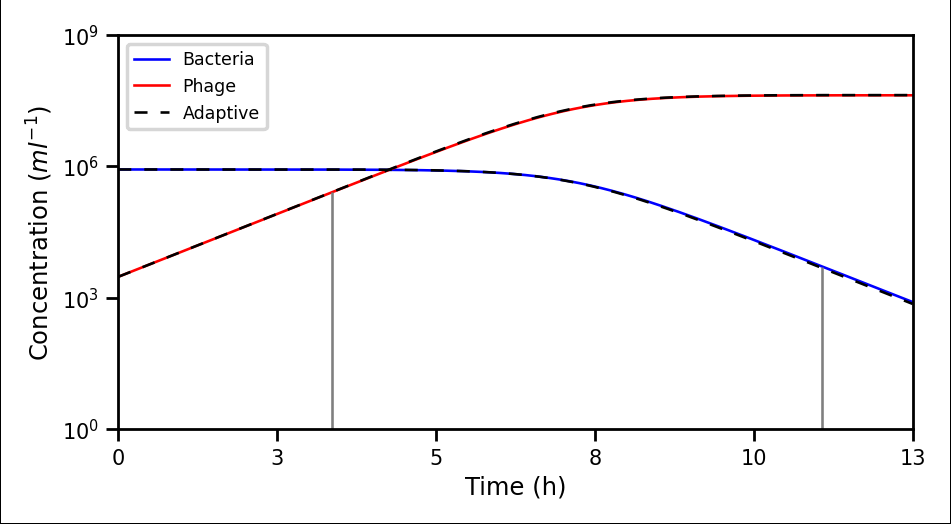

In [5]:
population_plot_comparison_and_tipping_points(t_full,tobs,tp_full,tp_p_full,tp_b_full,p_full,b_full,p,b)


In [7]:
print(f'Predation Critical Value: {(1 * 0.10) /(tobs * a)} phages/ml')
print(f'Burst Critical Value: {(1 * 0.10) /(tobs * c * a)} cells/ml')


Predation Critical Value: 256410.25641025638 phages/ml
Burst  Critical Value: 5128.205128205128 cells/ml


## Displaying the weight subplots for the processes at each point in time, along with their tipping points.

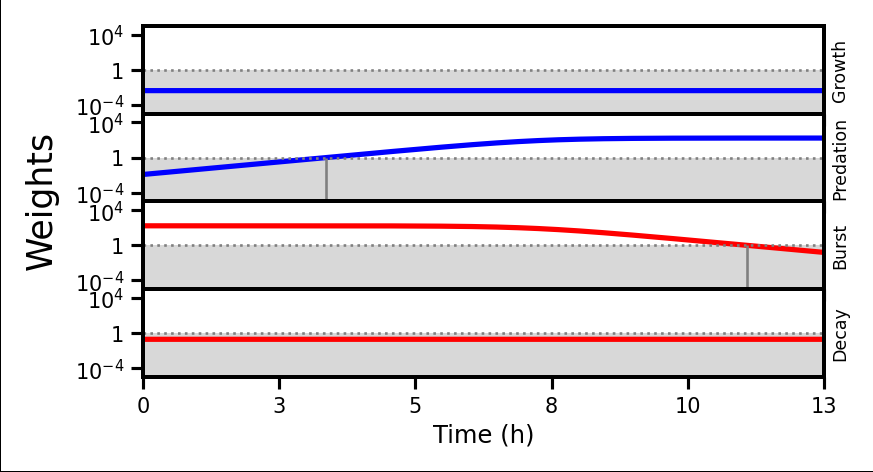

In [6]:
plot_weights_graphs(tobs,para_test[6],para_test[5],wg_full,wp_full,wb_full,wd_full, tp_p_full, tp_b_full)

## Calculation of the relevant processes per time point per agent, and displaying the total processes relevant as well as relevant processes per agent

In [8]:
process_counter_bacteria(thresholdlevel,t_full,processes_bacteria,wg_full,wp_full)
process_counter_phage(thresholdlevel,t_full,processes_phage,wb_full,wd_full)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


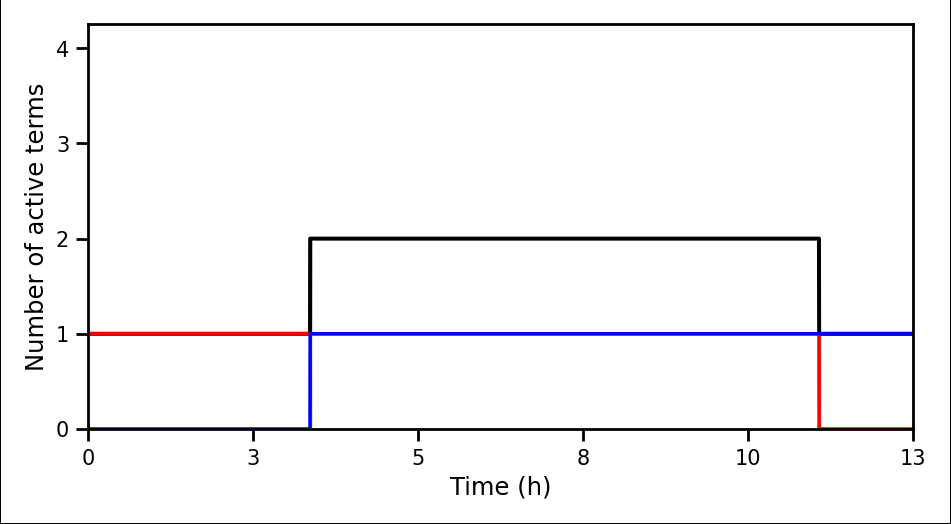

In [9]:
processes_graphs(t_full,tobs,pro_full,processes_phage,processes_bacteria,tp_full)

## Displaying the relative error per time point per agent, as well as the error in tipping points per model

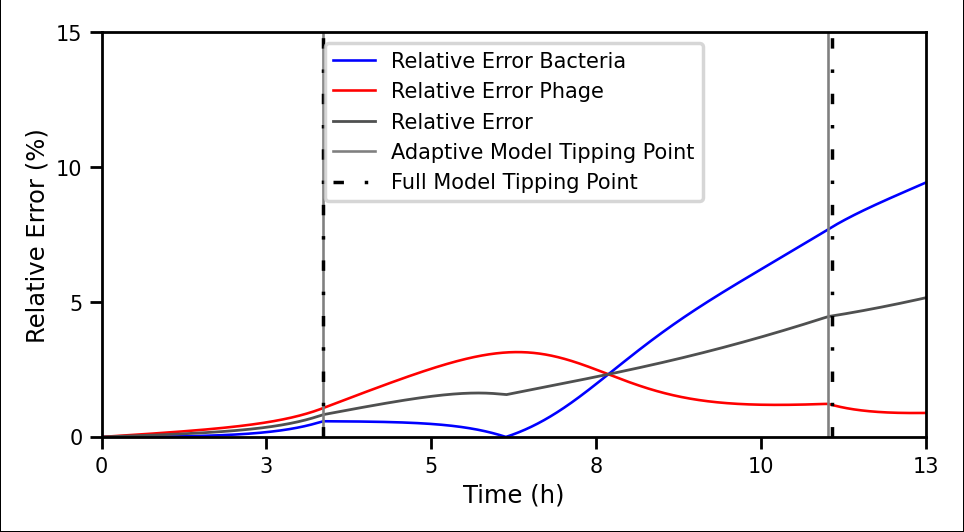

[[7.579122514774402e-15,
  0.00010128819720840787,
  0.00020259255383418086,
  0.0003039131019401558,
  0.0004052498743420994,
  0.0005066029030662709,
  0.0006079722203921184,
  0.0007093578582936799,
  0.0008107598490736564,
  0.0009121782251747967,
  0.0010136130200953121,
  0.0011150642679423565,
  0.0012165320008439447,
  0.0013180162517884958,
  0.001419517052833376,
  0.0015210344349810018,
  0.0016225684318625078,
  0.001724119077182297,
  0.00182568640397607,
  0.0019272704454152316,
  0.0020288712346120605,
  0.0021304888046252577,
  0.0022321231887095015,
  0.0023337744201943397,
  0.0024354425324420092,
  0.002537127558785679,
  0.0026388295327274547,
  0.0027405484878334067,
  0.0028422844576901397,
  0.0029440374758807663,
  0.0030458075762174984,
  0.003147594792534329,
  0.0032493991586757674,
  0.003351220708483956,
  0.0034530594758469917,
  0.003554915494634409,
  0.0036567887987742085,
  0.003758679422252497,
  0.0038605873988620818,
  0.003962512762547568,
  0.0040

In [10]:
relative_error_graphs(t,tobs,b_rel_error_percent,p_rel_error_percent,p_com_relative_error_percent,tp, tp_full)

In [15]:
tipping_point_error_finder(tp_full,tp)

Time error between the regime ending at 3.4973497349734974:0.22304832713755202
Time error between the regime ending at 11.521752175217522:0.552922590837285


## Displauing the phase diagram of the scenario

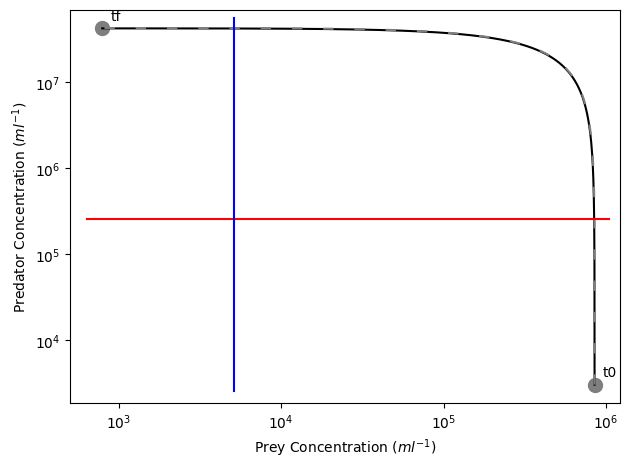

In [ ]:
phase_diagram_maker(p_full, p, b_full,b, para_test)

## Displaying the regime per time, error summary per regime and total error summary

Phage Minimum is 1.5158245029548804e-14
Phage Maximum is 3.147151947979681
Phage Median is 1.2223026815318772
Phage Mean is 1.4597680358322889
Phage Q1 is 0.876487049522564
Phage Q3 is 2.2408679391215562
Bacteria Minimum is 0.0
Bacteria Maximum is 9.435870909806807
Bacteria Median is 0.5758180867506981
Bacteria Mean is 2.658147956250784
Bacteria Q1 is 0.2044232605924234
Bacteria Q3 is 5.297528574222952
Combined Minimum is 7.579122514774402e-15
Combined Maximum is 5.163441900100406
Combined Median is 1.62996964713966
Combined Mean is 2.0589579960415367
Combined Q1 is 0.6512352689748344
Combined Q3 is 3.286855561093538


([13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13

<Figure size 640x480 with 0 Axes>

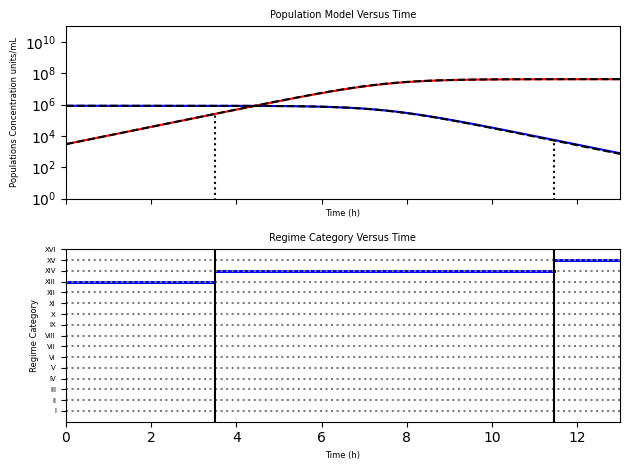

In [16]:
regime_finder(thresholdlevel,t,tobs,wg,wp,wb,wd,regime_store,tp,tp_p,tp_b,b,b_full,p,p_full,p_com_relative_error_percent,  p_rel_error_percent, b_rel_error_percent)

# This is used to export all retrieved values into a single xslx document for further analysis

In [ ]:
df_for_xslx = pd.DataFrame({
    'time': t_full,
    'time_adaptive':t,
    'phage_full': p_full,
    'bacteria_full': b_full,
    'phage_adaptive': p,
    'bacteria_adaptive': b,
    'process_full': pro_full,
    'processes': pro,
    'weight_growth_full': wg_full,
    'weight_predation_full': wp_full,
    'weight_burst_full': wb_full,
    'weight_decay_full': wd_full,
    'weight_growth': wg,
    'weight_predation': wp,
    'weight_burst': wb,
    'weight_decay': wd,
    'error_phage': p_error,
    'error_bacteria': b_error,
    'rel_error_phage': p_rel_error,
    'rel_error_bacteria': b_rel_error,
    'rel_error_phage_per': p_rel_error_percent,
    'rel_error_bac_per': b_rel_error_percent,
    'rel_error_com_per': p_com_relative_error_percent,
    'regime': regime_store
    })
excel_file = 'data_output.xlsx'
df_for_xslx.to_excel(excel_file, index=False, sheet_name='Sheet1')

# This is used to recover the intial conditions as well as the tipping points observed

In [ ]:
df_to_txt = pd.DataFrame({'Time Observed': [tobs], 'Bacterial Growth Rate':[r],'Phage Adsorption Rate':[a],'Burst Size':[c],'Phage Decay Rate':[m],'Threshold': [thresholdlevel], 'Reference Level': [reference_level], 'Tipping Points': [tp], 'Tipping Points for Burst Process': [tp_b], 'Tipping Points for Predation Process': [tp_p]})

# Convert DataFrame to string
df_string = df_to_txt.to_string(index=False)

# Write to a text file
with open('output.txt', 'w') as f:
    f.write(df_string)

## Simialr to the previously shown section, these input can be used to look at a different starting conditions and overlay it within the phase diagram

In [ ]:
#parameters
#growth parameter of bacteria
r_contained = 3.2 * 10**-5
#adsorption, the rate at which phages can enter a bacteria
a_contained = (3.0*10**-8)
c_contained = 50
#Decay rate of phage
m_contained = (1.5 * 10**-3)
tobs_contained = 13
bi_contained = 10**3
pi_contained = 10**4
reference_level_contained = 0.10
thresholdlevel_contained = 1.0
para_test_contained = (r_contained,a_contained,c_contained,m_contained,tobs_contained,reference_level_contained,thresholdlevel_contained)
y0_contained = [(bi_contained),(pi_contained)]
timespan_contained = (0,tobs_contained)
t_for_solver_contained = np.linspace(0,tobs_contained,10000)
#ODE solvers
sol_adapt_new_module_contained = solve_ivp(theta_approach_model,timespan_contained,y0=y0_contained,args=para_test_contained,method= 'LSODA',t_eval=t_for_solver_contained,rtol = 10**-13,atol= 10**-16)
sol_full_new_module_contained = solve_ivp(lotka_volterra_standard,timespan_contained,y0=y0_contained,args=para_test_contained,method= 'LSODA',t_eval=t_for_solver_contained,rtol = 10**-13,atol= 10**-16)
t_contained = sol_adapt_new_module.t
t_full_contained = sol_full_new_module.t
b_contained = sol_adapt_new_module_contained.y[0,:]
p_contained = sol_adapt_new_module_contained.y[1,:]
b_full_contained = sol_full_new_module_contained.y[0,:]
p_full_contained = sol_full_new_module_contained.y[1,:]

## Dislaying the phase diagram with new scenario added in green color

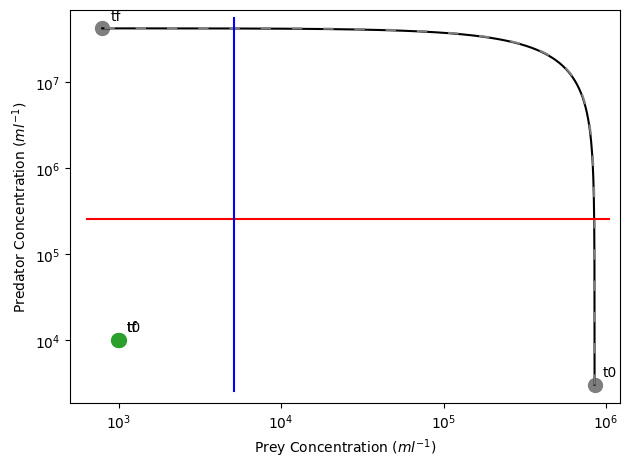

In [ ]:
phase_diagram_maker_with_contained(p_full, p, b_full,b, para_test, p_full_contained, p_contained,b_full_contained, b_contained)

## This section is used to run equation including the carrying capacity based scenario, below are the model defintions that are plugged into the solve_ivp function

In [ ]:
# Function for the input of a carrying capacity within the theta model
def theta_approach_model_carrying_capacity(t,populations_cc,rt,at,ct,mt,kt,tobst,reflevelt,activethrest):
  b_cc,p_cc = populations_cc
  theta_gcc_1 = theta_pcc_1 = theta_bcc_1 = theta_dcc_1 = theta_cc_1 = 1
  if ((tobst * rt * b_cc )/(reflevelt * b_cc)) < activethrest:
    theta_gcc_1 = 0
  if ((tobst * at * p_cc * b_cc)/(reflevelt * b_cc)) < activethrest:
    theta_pcc_1 = 0
  if ((tobst * ct * at * p_cc * b_cc)/(reflevelt * p_cc)) < activethrest:
    theta_bcc_1 = 0
  if ((tobst * mt * p_cc)/ (p_cc * reflevelt)) < activethrest:
    theta_dcc_1 = 0
  if ((tobst * rt * b_cc**2 )/(reflevelt * b_cc * kt)) < activethrest:
    theta_cc_1 = 0

  db_c = ((theta_gcc_1 * rt * b_cc ) - (theta_pcc_1 * at * b_cc * p_cc) - ((theta_cc_1 * rt * b_cc**2)/(kt)))
  dp_c = ((theta_bcc_1 * ct * at * b_cc * p_cc) - (theta_dcc_1 * mt * p_cc))
  return [db_c,dp_c]

# Function for the input of a carrying capacity within the full model
def lotka_volterra_standard_cc(t,populations_standard_cc,rt,at,ct,mt,kt,tobst,reflevelt,activethrest):
  bstandard_cc,pstandard_cc = populations_standard_cc
  theta_g_f = theta_p_f = theta_b_f = theta_d_f = theta_c_f = 1
  dbstandard_cc = ((theta_g_f * rt * bstandard_cc ) - (theta_p_f * at * bstandard_cc * pstandard_cc)- ((theta_c_f * rt * bstandard_cc**2)/(kt)))
  dpstandard_cc = ((theta_b_f * ct * at * bstandard_cc * pstandard_cc) - (theta_d_f * mt * pstandard_cc))
  return [dbstandard_cc,dpstandard_cc]

# Function to display carrying capacity as a weight by itself
def plot_carry_capacity(time_final, carry_capacity, thresholdlevel, reference_level):
    # Create time array
    t = np.linspace(0, time_final, len(carry_capacity))

    # Set up the figure and subplot
    fig, ax = plt.subplots(figsize=(3.632, 0.456), dpi=250)  # 230x29 pts

    # Define plot settings based on reference_level
    if reference_level == 1:
        y_lim = (1e-4, 1e4)
        y_ticks = [1e-3, 1, 1e3]
    elif reference_level == 0.10:
        y_lim = (1e-5, 1e5)
        y_ticks = [1e-4, 1, 1e4]
    else:
        raise ValueError("Unsupported reference_level")

    # Plot data
    ax.semilogy(t, carry_capacity, color='b', linewidth=1.50, label='Carry Capacity')

    # Add threshold line
    ax.axhline(y=thresholdlevel, color='tab:grey', linestyle='dotted', linewidth=0.75)

    # Add grey shading from 10^-4 to 1
    ax.axhspan(1e-4, 1, facecolor='tab:grey', alpha=0.3)

    # Set y-axis limits and ticks
    ax.set_ylim(y_lim)
    ax.set_yticks(y_ticks)

    # Format y-axis labels as 10^x
    def y_fmt(y, pos):
        if y == 1:
            return '1'
        decades = int(np.log10(y))
        return r'$10^{%d}$' % decades

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=6, pad=2, width=0.9)
    ax.tick_params(axis='both', which='minor', width=0.6)

    # Set x-axis scale and ticks based on time_final
    if time_final > 1000:
        ax.set_xscale('log')
        x_ticks = [10**i for i in range(int(np.log10(time_final))+1)]
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([f'$10^{int(np.log10(x))}$' if x > 1 else '1' for x in x_ticks])
    else:
        ax.set_xscale('linear')
        num_ticks = 6
        x_ticks = np.linspace(0, time_final, num_ticks)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([f'{x:.0f}' for x in x_ticks])

    # Set x-axis label
    ax.set_xlabel('Time (h)', fontsize=7, labelpad=2)

    # Set y-axis label on the right side
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('Carrying Capacity', fontsize=5, labelpad=2)

    # Adjust layout
    plt.tight_layout()

    # Add a thin border around the entire figure
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.75)

    # Save and show the figure
    plt.savefig('Carry_Capacity.svg', dpi=250, bbox_inches='tight')
    plt.show()


#parameters
r = 0.1
a = (3.0*10**-9)
c = 50
m = (0.1)
tobs = 30000
k = 10**9
bi = 6*10**5
pi = 6*10**6
reference_level = 0.10
thresholdlevel = 1.0
para_test_cc = (r,a,c,m,k,tobs,reference_level,thresholdlevel)
y0 = [(bi),(pi)]
timespan = (0,tobs)
t_for_solver = np.linspace(0, tobs,10000)
#ODE solvers for the carrying capacity
sol_adapt_cc_module = solve_ivp(theta_approach_model_carrying_capacity,timespan,y0=y0,args=para_test_cc,method= 'LSODA',t_eval=t_for_solver,rtol = 10**-13,atol= 10**-16)
sol_full_cc_module = solve_ivp(lotka_volterra_standard_cc,timespan,y0=y0,args=para_test_cc,method= 'LSODA',t_eval=t_for_solver,rtol = 10**-13,atol= 10**-16)
t_cc = sol_adapt_cc_module.t
t_full_cc = sol_full_cc_module.t
b_cc = sol_adapt_cc_module.y[0,:]
p_cc = sol_adapt_cc_module.y[1,:]
b_full_cc = sol_full_cc_module.y[0,:]
p_full_cc = sol_full_cc_module.y[1,:]
# weight definitions for the carrying capacity models
wg_function_cc = para_test_cc[5] * (para_test_cc[0] * b_cc/(para_test_cc[6] * b_cc))
wp_function_cc = para_test_cc[5] * ((para_test_cc[1] * p_cc * b_cc)/(para_test_cc[6] * b_cc))
wb_function_cc = para_test_cc[5] * ((para_test_cc[2] * para_test_cc[1] * p_cc * b_cc)/(para_test_cc[6] * p_cc))
wd_function_cc = para_test_cc[5] * ((para_test_cc[3] * p_cc)/(para_test_cc[6] * p_cc))
wk_function_cc = para_test_cc[5] * ((para_test_cc[0] * b_cc**2)/(para_test_cc[6] * b_cc * para_test_cc[4]))
##Weight_functions for ful model
wg_function_full_cc = para_test_cc[5] * (para_test_cc[0] * b_full_cc/(para_test_cc[6] * b_full_cc))
wp_function_full_cc = para_test_cc[5] * ((para_test_cc[1] * p_full_cc * b_full_cc)/(para_test_cc[6] * b_full_cc))
wb_function_full_cc = para_test_cc[5] * ((para_test_cc[2] * para_test_cc[1] * p_full_cc * b_full_cc)/(para_test_cc[6] * p_full_cc))
wd_function_full_cc = para_test_cc[5] * ((para_test_cc[3] * p_full_cc)/(para_test_cc[6] * p_full_cc))
wk_function_full_cc = para_test_cc[5] * ((para_test_cc[0] * b_full_cc**2)/(para_test_cc[6] * b_full_cc * para_test_cc[4]))
#Finding the weights for each adaptive processes
wg_cc = wp_cc = wb_cc = wd_cc = wk_cc = []
wg_cc = weights_finder(wg_function_cc,t_cc,wg_cc)
wp_cc = weights_finder(wp_function_cc,t_cc,wp_cc)
wb_cc = weights_finder(wb_function_cc,t_cc,wb_cc)
wd_cc = weights_finder(wd_function_cc,t_cc,wd_cc)
wk_cc = weights_finder(wk_function_cc,t_cc,wk_cc)
#Finding the weights for each full processes
wg_full_cc = wp_full_cc = wb_full_cc = wd_full_cc = wk_full_cc = []
wg_full_cc = weights_finder(wg_function_full_cc,t_cc,wg_full_cc)
wp_full_cc = weights_finder(wp_function_full_cc,t_cc,wp_full_cc)
wd_full_cc = weights_finder(wd_function_full_cc,t_cc,wd_full_cc)
wb_full_cc = weights_finder(wb_function_full_cc,t_cc,wb_full_cc)
wk_full_cc = weights_finder(wk_function_full_cc,t_cc,wk_full_cc)
#Finding the tipping points for each adaptive process, if there is one
tp_g_cc = tp_p_cc = tp_b_cc = tp_d_cc = tp_k_cc =[]
tp_g_cc = tipping_point_finder(wg_cc,t_cc,tp_g_cc,para_test_cc[7])
tp_p_cc = tipping_point_finder(wp_cc,t_cc,tp_p_cc,para_test_cc[7])
tp_b_cc = tipping_point_finder(wb_cc,t_cc,tp_b_cc,para_test_cc[7])
tp_d_cc = tipping_point_finder(wd_cc,t_cc,tp_d_cc,para_test_cc[7])
tp_k_cc = tipping_point_finder(wk_cc,t_cc,tp_k_cc,para_test_cc[7])
tp_cc = tp_g_cc + tp_p_cc + tp_b_cc + tp_d_cc + tp_k_cc
#Finding the tipping points for each full process, if there is one
tp_g_full_cc = tp_p_full_cc = tp_b_full_cc = tp_d_full_cc = tp_k_full_cc = []
tp_g_full_cc = tipping_point_finder(wg_full_cc,t_full_cc,tp_g_full_cc,para_test_cc[7])
tp_p_full_cc = tipping_point_finder(wp_full_cc,t_full_cc,tp_p_full_cc,para_test_cc[7])
tp_b_full_cc = tipping_point_finder(wb_full_cc,t_full_cc,tp_b_full_cc,para_test_cc[7])
tp_d_full_cc = tipping_point_finder(wd_full_cc,t_full_cc,tp_b_full_cc,para_test_cc[7])
tp_k_full_cc = tipping_point_finder(wk_full_cc,t_full_cc,tp_k_full_cc,para_test_cc[7])
tp_full_cc = tp_g_full_cc + tp_p_full_cc + tp_b_full_cc + tp_d_full_cc + tp_k_full_cc

## New functions utilized to investigate the carrying capacity elements

In [ ]:
# New population dynamic displaying function that is used on the carrying capacity
def population_plot_comparison_and_tipping_points_cc(time_list, time_final, tipping_point_list, tipping_points_of_weight_predation, tipping_points_of_weights_burst, tipping_points_of_weights_carrying_capacity, Agent_full_phage, Agent_full_bacteria, Agent_adaptive_phage, Agent_adaptive_bacteria):
    print('Below are the graphs representing both the tipping points and populations plot of both models')

    # Calculate the figure size to maintain the 227:127 ratio
    width_inches = 3.632
    height_inches = width_inches * (114 / 215)

    # Set up the figure and subplots
    fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=250)

    ax.semilogy(time_list, Agent_full_bacteria, label='Bacteria', color='b', linestyle='solid', linewidth=0.75)
    ax.semilogy(time_list, Agent_full_phage, label='Phage', color='r', linestyle='solid', linewidth=0.75)
    ax.semilogy(time_list, Agent_adaptive_bacteria, label='Adaptive', color='k', linestyle='dashed', dashes=(5,5), linewidth=0.75)
    ax.semilogy(time_list, Agent_adaptive_phage, color='k', linestyle='dashed', dashes=(5,5), linewidth=0.75)

    ax.set_xlabel("Time (h)", fontsize=7, labelpad=2)
    ax.set_ylabel('Concentration ($ml^{-1}$)', fontsize=7, labelpad=2)

    # Set x-axis scale based on time_final
    if time_final > 1000:
        ax.set_xscale('log')
        ax.set_xlim(1, time_final)  # Start from 1 to avoid log(0) issues

        # Add minor ticks for log scale (x-axis only)
        locmin = ticker.LogLocator(base=10.0, subs=(0.2,0.4,0.6,0.8), numticks=12)
        ax.xaxis.set_minor_locator(locmin)
        ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    else:
        ax.set_xscale('linear')
        ax.set_xlim(0, time_final)

        # Add minor ticks for linear scale (x-axis only)
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

    # Remove minor ticks from y-axis
    ax.yaxis.set_minor_locator(ticker.NullLocator())

    if round(np.log10(max(Agent_full_phage))) > round(np.log10(max(Agent_full_bacteria))):
        max_limit = (1 * (10**round(np.log10(max(Agent_full_phage)))))
        ax.set_ylim(1, max_limit)
    else:
        max_limit = (1 * (10**round(np.log10(max(Agent_full_bacteria)))))
        ax.set_ylim(1, max_limit)

    if max_limit < 10**9:
        ax.set_yticks([10**0, 10**3, 10**6, 10**9])
    else:
        ax.set_yticks([10**0, 10**3, 10**6, 10**9, 10**12])

    # Format y-axis labels as 10^x
    def y_fmt(y, pos):
        decades = int(np.log10(y))
        return r'$10^{%d}$' % decades

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

    # Adjust x-axis ticks
    if time_final > 1000:
        x_ticks = [10**i for i in range(int(np.log10(time_final))+1)]
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([f'$10^{int(np.log10(x))}$' if x > 1 else '1' for x in x_ticks])
    else:
        num_ticks = 6
        x_ticks = np.linspace(0, time_final, num_ticks)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([f'{x:.0f}' for x in x_ticks])

    # Setting up the vertical lines for tipping points
    if len(tipping_point_list) != 0:
        for tps in tipping_point_list:
            if tps in tipping_points_of_weight_predation:
                ax.vlines(x=tps, ymin=0, ymax=(float(Agent_full_phage[np.where(time_list == tps)[0][0]])), color='tab:grey', linestyle='solid', linewidth=0.75)
            elif tps in tipping_points_of_weights_burst:
                ax.vlines(x=tps, ymin=0, ymax=(float(Agent_full_bacteria[np.where(time_list == tps)[0][0]])), color='tab:grey', linestyle='solid', linewidth=0.75)
            elif tps in tipping_points_of_weights_carrying_capacity:
                ax.vlines(x=tps, ymin=0, ymax=(float(Agent_full_bacteria[np.where(time_list == tps)[0][0]])), color='tab:grey', linestyle='solid', linewidth=0.75)
            else:
                print('error')

    ax.legend(fontsize=5, loc='best')

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=6, pad=2)
    ax.tick_params(axis='x', which='minor', labelsize=4, pad=2)

    plt.tight_layout(pad=0.1)

    # Add a thin border around the entire figure
    fig.patch.set_linewidth(0.5)
    fig.patch.set_edgecolor('black')

    # Save and show the figure
    plt.savefig('population_comparison_graph.svg', dpi=250, bbox_inches='tight')
    plt.show()
    return




In [ ]:
def plot_combined_graphs(time_final, threshholdlevel, reference_level, weight_growth, weight_predation, weight_burst, weight_decay, carry_capacity, tipping_point_list_predation, tipping_point_list_burst):
    # Create time array
    t = np.linspace(0, time_final, len(weight_growth))

    # Set up the figure and subplots
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(3.632, 2.28), dpi=250)

    # Define plot settings based on reference_level
    if reference_level == 1:
        y_lim = (1e-4, 1e4)
        y_ticks = [1e-3, 1, 1e3]
    elif reference_level == 0.10:
        y_lim = (1e-5, 1e5)
        y_ticks = [1e-4, 1, 1e4]
    else:
        raise ValueError("Unsupported reference_level")

    # Plot data
    plot_data = [
        (weight_growth, 'Growth Weight', 'Growth', 'b'),
        (weight_predation, 'Predation Weight', 'Predation', 'b'),
        (carry_capacity, 'Carrying Capacity', 'Carrying Capacity', 'b'),
        (weight_burst, 'Burst Weight', 'Burst', 'r'),
        (weight_decay, 'Decay Weight', 'Decay', 'r')
    ]

    for i, (data, label, ylabel, color) in enumerate(plot_data):
        ax = axs[i]
        ax.semilogy(t, data, label=label, color=color, linewidth=1.50)
        ax.yaxis.set_label_position("right")
        ax.set_ylabel(ylabel, fontsize=5, labelpad=2)
        ax.set_ylim(y_lim)
        ax.set_yticks(y_ticks)
        ax.axhline(y=threshholdlevel, color='tab:grey', linestyle='dotted', linewidth=0.75)
        ax.axhline(y=0, color='k', linewidth=0.75)
        ax.axhspan(1e-5, 1e0, facecolor='tab:grey', alpha=0.3)

        # Format y-axis labels as 10^x
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '1' if y == 1 else r'$10^{%d}$' % int(np.log10(y))))

        # Adjust tick parameters
        ax.tick_params(axis='both', which='major', labelsize=6, pad=2, width=0.9)
        ax.tick_params(axis='both', which='minor', width=0.6)
        if i < 4:  # Remove x-axis labels for all but the last subplot
            ax.tick_params(axis='x', labelbottom=False)
        if i == 1:
            for tps in tipping_point_list_predation:
                ax.vlines(x=tps, ymin=0, ymax=1, color='tab:grey', linestyle='solid', linewidth=0.75)
        if i == 2:
            for tps in tipping_point_list_burst:
                ax.vlines(x=tps, ymin=0, ymax=1, color='tab:grey', linestyle='solid', linewidth=0.75)

        # Keep all spines visible
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1.15)

    # Set x-label for the bottom subplot
    axs[-1].set_xlabel('Time (h)', fontsize=7, labelpad=2)

    # Set x-axis scale based on time_final
    if time_final > 1000:
        for ax in axs:
            ax.set_xscale('log')
        x_ticks = [10**i for i in range(int(np.log10(time_final))+1)]
        axs[-1].set_xticks(x_ticks)
        axs[-1].set_xticklabels([f'$10^{int(np.log10(x))}$' if x > 1 else '1' for x in x_ticks])
        axs[-1].set_xlim(1, time_final)  # Start from 1 to avoid log(0) issues
    else:
        for ax in axs:
            ax.set_xscale('linear')
        num_ticks = 6
        x_ticks = np.linspace(0, time_final, num_ticks)
        axs[-1].set_xticks(x_ticks)
        axs[-1].set_xticklabels([f'{x:.0f}' for x in x_ticks])
        axs[-1].set_xlim(0, time_final)

    # Adjust layout to remove space between subplots
    plt.subplots_adjust(hspace=0, left=0.15)  # Increased left margin for the new label

    # Add a thin border around the entire figure
    fig.patch.set_linewidth(.5)
    fig.patch.set_edgecolor('black')

    # Add the larger "Weights" label on the left side
    fig.text(0.02, 0.5, 'Weights', va='center', rotation='vertical', fontsize=10)

    # Save and show the figure
    plt.savefig('Combined_Weights_and_Capacity.svg', dpi=250, bbox_inches='tight')
    plt.show()


In [ ]:

def relative_error_graphs_cc(time_list, time_final, p_bac_relative_error_percent, p_pha_relative_error_percent, p_com_relative_error_percent, tipping_point_list_adaptive, tipping_point_list_full):
    for t in range(len(p_bac_relative_error_percent)):
        p_com_relative_error_percent_ind = np.mean([p_bac_relative_error_percent[t], p_pha_relative_error_percent[t]])
        p_com_relative_error_percent.append(p_com_relative_error_percent_ind)

    # Calculate the figure size to maintain the 227:127 ratio
    width_inches = 3.632
    height_inches = width_inches * (114 / 215)

    # Set up the figure and subplots
    fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=250)

    ax.semilogx(time_list, p_bac_relative_error_percent, label='Relative Error Bacteria', color='b', linewidth=0.75)
    ax.semilogx(time_list, p_pha_relative_error_percent, label='Relative Error Phage', color='r', linewidth=0.75)
    ax.semilogx(time_list, p_com_relative_error_percent, label="Relative Error", color='#4f5050', linewidth=0.8)

    ax.set_xlabel("Time (h)", fontsize=7, labelpad=2)
    ax.set_ylabel("Relative Error (%)", fontsize=7, labelpad=2)
    ax.set_xlim(1, time_final)  # Start from 1 to avoid log(0) issues

    # Set up logarithmic x-axis ticks
    x_ticks = [10**i for i in range(int(np.log10(time_final))+1)]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'$10^{int(np.log10(x))}$' if x > 1 else '1' for x in x_ticks])

    # Add minor ticks
    ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0.1, 1, 0.1), numticks=10))
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())

    for tps in tipping_point_list_adaptive:
        if tps == tipping_point_list_adaptive[0]:
            ax.axvline(x=tps, ymin=0, ymax=1, color='tab:grey', linestyle='solid', linewidth=0.75, label='Adaptive Model Tipping Point')
        else:
            ax.axvline(x=tps, ymin=0, ymax=1, color='tab:grey', linestyle='solid', linewidth=0.75)
    for tps in tipping_point_list_full:
        if tps == tipping_point_list_full[0]:
            ax.axvline(x=tps, ymin=0, ymax=1, color='k', linestyle=(0, (3, 6, 1, 6)), linewidth=1, label='Full Model Tipping Point')
        else:
            ax.axvline(x=tps, ymin=0, ymax=1, color='k', linestyle=(0, (3, 6, 1, 6)), linewidth=1)

    ax.legend(fontsize=6, loc='best')

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=6, pad=2)
    ax.tick_params(axis='x', which='minor', labelsize=4, pad=2)

    plt.tight_layout(pad=0.1)

    # Add a thin border around the entire figure
    fig.patch.set_linewidth(0.5)
    fig.patch.set_edgecolor('black')

    # Calculate the maximum relative error
    max_relative_error = max(max(p_bac_relative_error_percent), max(p_pha_relative_error_percent))

    # Set up the main plot
    ax.set_ylim(0, 15)
    ax.set_yticks([0, 5, 10, 15])
    ax.set_yticklabels(['0', '5', '10', '15'])

    # Create an inlay if the maximum relative error exceeds 15%
    if max_relative_error > 15:
        # Find the last tipping point
        last_tipping_point = max(max(tipping_point_list_adaptive or [0]), max(tipping_point_list_full or [0]))

        # Calculate inlay position (between last tipping point and end of graph)
        inlay_left = 0.5 + (0.45 * np.log10(last_tipping_point) / np.log10(time_final))
        inlay_width = 0.45 * (1 - np.log10(last_tipping_point) / np.log10(time_final))

        # Create an inlay axes
        inlay_ax = fig.add_axes([inlay_left, 0.65, inlay_width, 0.25])  # [left, bottom, width, height]

        # Plot the full range data in the inlay
        inlay_ax.semilogx(time_list, p_bac_relative_error_percent, color='b', linewidth=0.5)
        inlay_ax.semilogx(time_list, p_pha_relative_error_percent, color='r', linewidth=0.5)
        inlay_ax.semilogx(time_list, p_com_relative_error_percent, color='#4f5050', linewidth=0.5)

        # Set the y-axis limits for the inlay
        inlay_ax.set_ylim(0, max(50, max_relative_error * 1.1))  # Set upper limit to at least 50 or 10% above max error

        # Set x-axis limits for the inlay
        inlay_ax.set_xlim(1, time_final)

        # Set x-ticks for the inlay (similar to main plot)
        inlay_ax.set_xticks(x_ticks)
        inlay_ax.set_xticklabels([f'$10^{int(np.log10(x))}$' if x > 1 else '1' for x in x_ticks], fontsize=5)

        # Set y-ticks for inlay
        inlay_ax.set_yticks([0, 25, 50])
        inlay_ax.set_yticklabels(['0', '25', '50'])

        # Adjust tick parameters for the inlay
        inlay_ax.tick_params(axis='both', which='major', labelsize=5)

    # Save the figure with inlay (if applicable)
    plt.savefig('relative_error_with_inlay.svg', dpi=250, bbox_inches='tight')
    plt.show()
    return [p_com_relative_error_percent]


## Weight subplots of the carrying capacity and other processes in the models utilizing carrying capacity

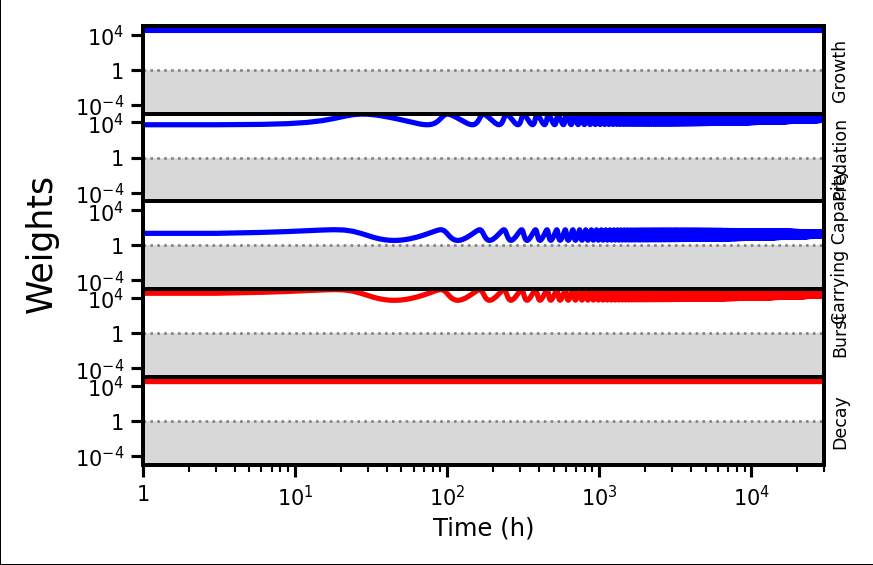

In [ ]:
plot_combined_graphs(tobs,thresholdlevel,reference_level,wg_full_cc,wp_full_cc,wb_full_cc,wd_full_cc,wk_full_cc,tp_p_full_cc,tp_b_full_cc)

## Population dynamics of the carrying capacity containing models

Below are the graphs representing both the tipping points and populations plot of both models


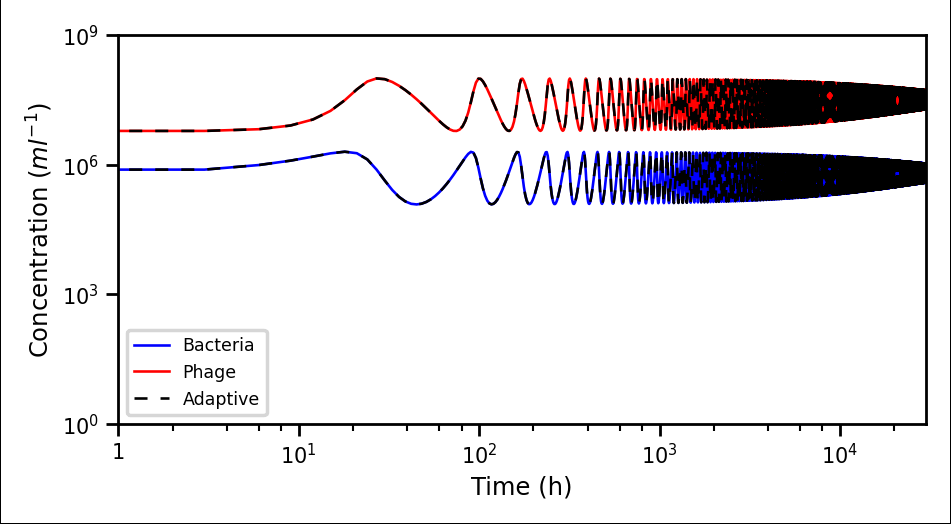

In [ ]:
population_plot_comparison_and_tipping_points_cc(t_cc,tobs,tp_full_cc,tp_p_full_cc,tp_b_full_cc,tp_k_full_cc,p_full_cc,b_full_cc,p_cc,b_cc)

## Calculating the error of the carrying capacity containing scenarios, and displaying the relative error graph

In [17]:
p_error_cc = p_rel_error_cc = p_rel_error_percent_cc = []
b_error_cc = b_rel_error_cc = b_rel_error_percent_cc = []
p_com_relative_error_percent_cc = []
p_error_cc = true_error(t_cc,p_full_cc,p_cc,p_error_cc)
p_rel_error_cc = relative_error(t_cc,p_error_cc,p_full_cc,p_rel_error_cc)
p_rel_error_percent_cc = relative_error_percentage_finder(p_rel_error_cc,t_cc,p_rel_error_percent_cc)
b_error_cc = true_error(t_cc,b_full_cc,b_cc,b_error_cc)
b_rel_error_cc = relative_error(t_cc,b_error_cc,b_full_cc,b_rel_error_cc)
b_rel_error_percent_cc = relative_error_percentage_finder(b_rel_error_cc,t_cc,b_rel_error_percent_cc)
relative_error_graphs_cc(t_cc,tobs,b_rel_error_percent_cc,p_rel_error_percent_cc,p_com_relative_error_percent_cc,tp_cc, tp_full_cc)

NameError: name 't_cc' is not defined

##

In [ ]:
df_for_xslx = pd.DataFrame({
    'time_full': t_full_cc,
    'time': t_cc,
    'phage_full': p_full_cc,
    'bacteria_full': b_full_cc,
    'phage_adaptive': p_cc,
    'bacteria_adaptive': b_cc,
    'weight_growth_full': wg_full_cc,
    'weight_predation_full': wp_full_cc,
    'weight_burst_full': wb_full_cc,
    'weight_decay_full': wd_full_cc,
    'weight_carrying_capacity_full': wk_full_cc,
    'weight_growth': wg_cc,
    'weight_predation': wp_cc,
    'weight_burst': wb_cc,
    'weight_decay': wd_cc,
    'weight_carrying_capacity': wk_cc,
    'error_phage': p_error_cc,
    'error_bacteria': b_error_cc,
    'rel_error_phage': p_rel_error_cc,
    'rel_error_bacteria': b_rel_error_cc,
    'rel_error_phage_per': p_rel_error_percent_cc,
    'rel_error_bac_per': b_rel_error_percent_cc,
    'rel_error_com_per': p_com_relative_error_percent_cc,
     })
excel_file = 'data_output_cc.xlsx'
df_for_xslx.to_excel(excel_file, index=False, sheet_name='Sheet1')